In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import integrate

In [2]:
#Initial conditions
Omega_D = 2.0/3.0
T = 2*np.pi
F = 0.0
q = 0.0
theta_0 = 0.01
omega_0 = 0.0

In [3]:
def derivatives (t, y, F, q):
  return[y[1], -np.sin(y[0])-q*y[1]+F*np.sin(2/3*t)]

In [4]:
solution = integrate.solve_ivp(
    fun=derivatives,
    t_span=(0, 20000*np.pi),
    y0 = (theta_0, 0),
    args = (F, q),
    t_eval = np.linspace (0, 20000*np.pi, 500000),
)
t,y, dydt = solution.t, solution.y[0], solution.y[1]

In [5]:
y_natural = theta_0*np.cos(t) + omega_0 * np.sin(t)

(0.0, 62.83185307179586)

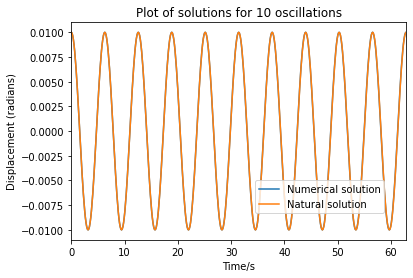

In [6]:
#For 10 ascillations
fig, ax1 = plt.subplots()
ax1.plot(t, y, label="Numerical solution")
ax1.plot(t, y_natural, label="Natural solution")
ax1.set_xlabel("Time/s")
ax1.set_ylabel("Displacement (radians)")
ax1.set_title("Plot of solutions for 10 oscillations")
ax1.legend(loc="lower right", bbox_to_anchor=(0.95, 0.1))
plt.xlim([0, 20*np.pi])


(596.9026041820607, 628.3185307179587)

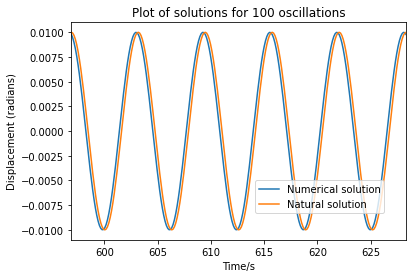

In [7]:
#For 100 oscillations near the end
fig, ax1 = plt.subplots()
ax1.plot(t, y, label="Numerical solution")
ax1.plot(t, y_natural, label="Natural solution")
ax1.set_xlabel("Time/s")
ax1.set_ylabel("Displacement (radians)")
ax1.set_title("Plot of solutions for 100 oscillations")
ax1.legend(loc="lower right", bbox_to_anchor=(0.95, 0.1))
plt.xlim([190*np.pi, 200*np.pi])


(6267.477343911637, 6283.185307179586)

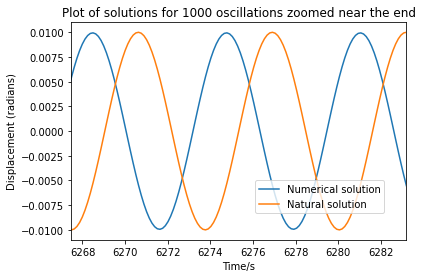

In [8]:
#For 1000 oscillations zoomed near the end
fig, ax1 = plt.subplots()
ax1.plot(t, y, label="Numerical solution")
ax1.plot(t, y_natural, label="Natural solution")
ax1.set_xlabel("Time/s")
ax1.set_ylabel("Displacement (radians)")
ax1.set_title("Plot of solutions for 1000 oscillations zoomed near the end")
ax1.legend(loc="lower right", bbox_to_anchor=(0.95, 0.1))
plt.xlim([1995*np.pi, 2000*np.pi])

(62800.437145259966, 62831.853071795864)

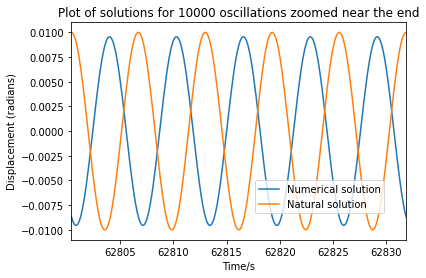

In [9]:
#For 10000 oscillations zoomed near the end
fig, ax1 = plt.subplots()
ax1.plot(t, y, label="Numerical solution")
ax1.plot(t, y_natural, label="Natural solution")
ax1.set_xlabel("Time/s")
ax1.set_ylabel("Displacement (radians)")
ax1.set_title("Plot of solutions for 10000 oscillations zoomed near the end")
ax1.legend(loc="lower right", bbox_to_anchor=(0.95, 0.1))
plt.xlim([19990*np.pi, 20000*np.pi])

(0.0, 62831.853071795864)

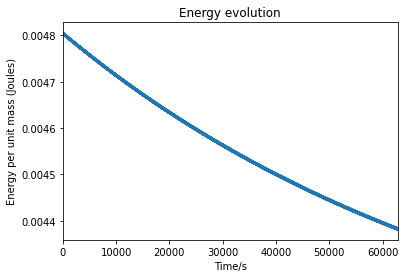

In [10]:
#Energy per unit mass
energy= 9.8**2*(0.5*dydt**2 + (1-np.cos(y)))

fig, ax1 = plt.subplots()
ax1.plot(t, energy, label="Energy evolution")
ax1.set_xlabel("Time/s")
ax1.set_ylabel("Energy per unit mass (Joules)")
ax1.set_title("Energy evolution")
plt.xlim([0, 20000*np.pi])

In [11]:
#A function for finding the period
def find_period(t, y):
  counter=0
  cycles=0

  while (y[counter]>0):
    counter+=1
  first_zero=counter
  
  while (counter<len(t)-1):
    if (y[counter+1]<0 and y[counter]>=0):
      cycles+=1
      last_zero=counter
    counter+=1

  return (t[last_zero]-t[first_zero])/cycles




In [12]:
#Integrating for various values of the starting amplitude
Amps = np.linspace(0.01, np.pi - 0.2, 101)
period=np.empty(len(Amps))
for i in range (len(Amps)):
  solution = integrate.solve_ivp(
      fun=derivatives,
      t_span=(0, 200*np.pi),
      y0 = (Amps[i], 0),
      args = (F, q),
      t_eval = np.linspace (0, 200*np.pi, 5000),
  )
  t,y, dydt = solution.t, solution.y[0], solution.y[1]
  period[i]=find_period(t,y)




period is 7.266568975957262


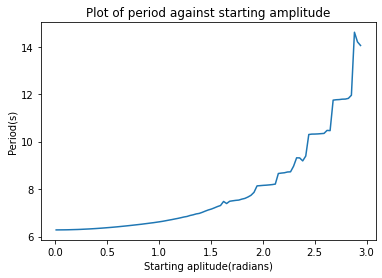

In [13]:
#Creating the plot and finding the period
fig, ax1 = plt.subplots()
ax1.plot(Amps, period, label="Period")
ax1.set_xlabel("Starting aplitude(radians)")
ax1.set_ylabel("Period(s)")
ax1.set_title("Plot of period against starting amplitude")

solution = integrate.solve_ivp(
      fun=derivatives,
      t_span=(0, 200*np.pi),
      y0 = (np.pi/2, 0),
      args = (F, q),
      t_eval = np.linspace (0, 200*np.pi, 5000),
  )
t,y, dydt = solution.t, solution.y[0], solution.y[1]
print("period is", find_period(t,y))

We investigate the behavious of a pendulum under the small angle approximation. By comparasion we see that initially our numerical and the theoretical solution agree very well, but for later stages a phase shift is induced. We also a small, yeat clear decline in the energy when finding it for 10 000 oscillations. We see the small angle approximation breaking down when increasing the starting angle. The period for pi/2 starting angle is 7.26, which is still somewhat close. Finally, for values closer to pi, we see the period falling down. The jagged line is caused by the discrete method of finding the period.



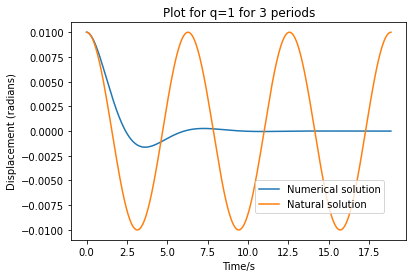

In [14]:
#Turning up damping
q=1.0
solution = integrate.solve_ivp(
    fun=derivatives,
    t_span=(0, 6*np.pi),
    y0 = (theta_0, 0),
    args = (F, q),
    t_eval = np.linspace (0, 6*np.pi, 500),
)
t1,y1, dydt1 = solution.t, solution.y[0], solution.y[1]
y_natural1 = theta_0*np.cos(t1) + omega_0 * np.sin(t1)

fig, ax1 = plt.subplots()
ax1.plot(t1, y1, label="Numerical solution")
ax1.plot(t1, y_natural1, label="Natural solution")
ax1.set_xlabel("Time/s")
ax1.set_ylabel("Displacement (radians)")
ax1.set_title("Plot for q=1 for 3 periods")
ax1.legend(loc="lower right", bbox_to_anchor=(0.95, 0.1))




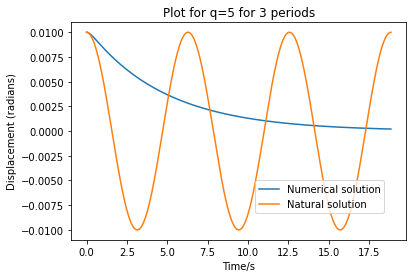

In [15]:
q=5.0
solution = integrate.solve_ivp(
    fun=derivatives,
    t_span=(0, 6*np.pi),
    y0 = (theta_0, 0),
    args = (F, q),
    t_eval = np.linspace (0, 6*np.pi, 500),
)
t1,y1, dydt1 = solution.t, solution.y[0], solution.y[1]
y_natural1 = theta_0*np.cos(t1) + omega_0 * np.sin(t1)

fig, ax1 = plt.subplots()
ax1.plot(t1, y1, label="Numerical solution")
ax1.plot(t1, y_natural1, label="Natural solution")
ax1.set_xlabel("Time/s")
ax1.set_ylabel("Displacement (radians)")
ax1.set_title("Plot for q=5 for 3 periods")
ax1.legend(loc="lower right", bbox_to_anchor=(0.95, 0.1))


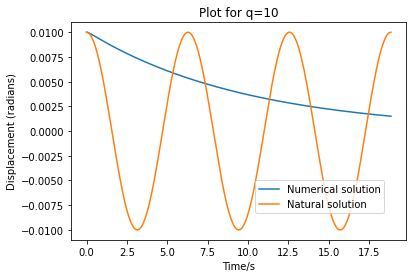

In [16]:
q=10.0
solution = integrate.solve_ivp(
    fun=derivatives,
    t_span=(0, 6*np.pi),
    y0 = (theta_0, 0),
    args = (F, q),
    t_eval = np.linspace (0, 6*np.pi, 500),
)
t1,y1, dydt1 = solution.t, solution.y[0], solution.y[1]
y_natural1 = theta_0*np.cos(t1) + omega_0 * np.sin(t1)

fig, ax1 = plt.subplots()
ax1.plot(t1, y1, label="Numerical solution")
ax1.plot(t1, y_natural1, label="Natural solution")
ax1.set_xlabel("Time/s")
ax1.set_ylabel("Displacement (radians)")
ax1.set_title("Plot for q=10")
ax1.legend(loc="lower right", bbox_to_anchor=(0.95, 0.1))


period is 7.481628433884074


(0.0, 62.83185307179586)

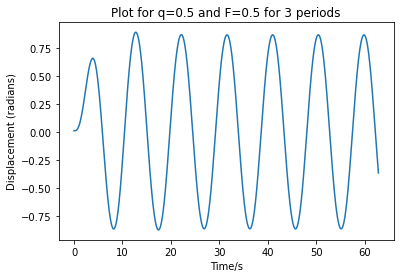

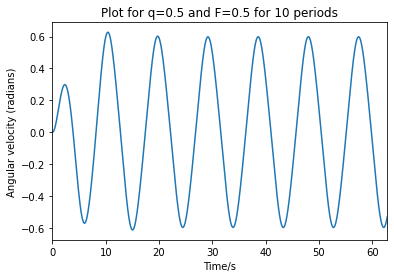

In [17]:
q=0.5
F=0.5
solution = integrate.solve_ivp(
    fun=derivatives,
    t_span=(0, 20*np.pi),
    y0 = (theta_0, 0),
    args = (F, q),
    t_eval = np.linspace (0, 20*np.pi, 5000),
)
t1,y1, dydt1 = solution.t, solution.y[0], solution.y[1]

fig, ax1 = plt.subplots()
ax1.plot(t1, y1, label="Numerical solution")
#ax1.plot(t1, y_natural1, label="Natural solution")
ax1.set_xlabel("Time/s")
ax1.set_ylabel("Displacement (radians)")
ax1.set_title("Plot for q=0.5 and F=0.5 for 3 periods")
print("period is",  find_period(t1, dydt1))
fig, ax1 = plt.subplots()
ax1.plot(t1, dydt1, label="Numerical solution")
ax1.set_xlabel("Time/s")
ax1.set_ylabel("Angular velocity (radians)")
ax1.set_title("Plot for q=0.5 and F=0.5 for 10 periods")
plt.xlim([0, 20*np.pi])

In [18]:
F=1.2
q=0.5
solution = integrate.solve_ivp(
    fun=derivatives,
    t_span=(0, 4000*np.pi),
    y0 = (theta_0, 0),
    args = (F, q),
    t_eval = np.linspace (0, 4000*np.pi, 1000000),
)
t12,y12, dydt12 = solution.t, solution.y[0], solution.y[1]


In [19]:
F=1.44
solution = integrate.solve_ivp(
    fun=derivatives,
    t_span=(0, 4000*np.pi),
    y0 = (theta_0, 0),
    args = (F, q),
    t_eval = np.linspace (0, 4000*np.pi, 1000000),
)
t14,y14, dydt14 = solution.t, solution.y[0], solution.y[1]

In [20]:
F=1.465
solution = integrate.solve_ivp(
    fun=derivatives,
    t_span=(0, 4000*np.pi),
    y0 = (theta_0, 0),
    args = (F, q),
    t_eval = np.linspace (0, 4000*np.pi, 1000000),
)
t1465,y1465, dydt1465 = solution.t, solution.y[0], solution.y[1]

period is 9.926826811002107


(0.0, 62.83185307179586)

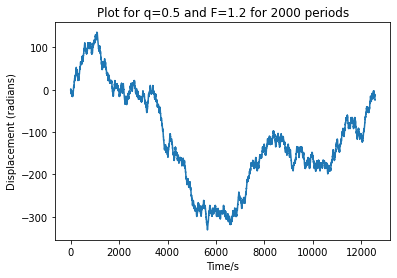

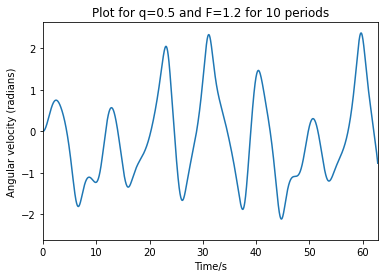

In [21]:
fig, ax1 = plt.subplots()
ax1.plot(t12, y12, label="Numerical solution")
ax1.set_xlabel("Time/s")
ax1.set_ylabel("Displacement (radians)")
ax1.set_title("Plot for q=0.5 and F=1.2 for 2000 periods")
print("period is",  find_period(t12, dydt12))
fig, ax1 = plt.subplots()
ax1.plot(t12, dydt12, label="Numerical solution")
ax1.set_xlabel("Time/s")
ax1.set_ylabel("Angular velocity (radians)")
ax1.set_title("Plot for q=0.5 and F=1.2 for 10 periods")
plt.xlim([0, 20*np.pi])


period is 9.414246319005601


(0.0, 62.83185307179586)

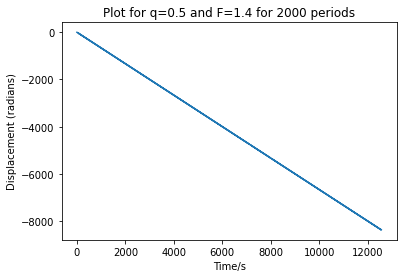

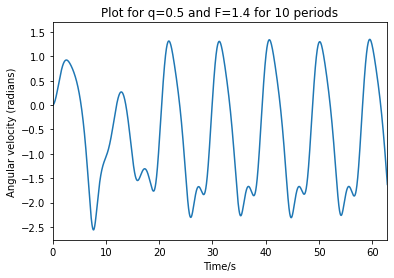

In [22]:
fig, ax1 = plt.subplots()
ax1.plot(t14, y14, label="Numerical solution")
ax1.set_xlabel("Time/s")
ax1.set_ylabel("Displacement (radians)")
ax1.set_title("Plot for q=0.5 and F=1.4 for 2000 periods")
print("period is",  find_period(t14, dydt14))
fig, ax1 = plt.subplots()
ax1.plot(t14, dydt14, label="Numerical solution")
ax1.set_xlabel("Time/s")
ax1.set_ylabel("Angular velocity (radians)")
ax1.set_title("Plot for q=0.5 and F=1.4 for 10 periods")
plt.xlim([0, 20*np.pi])

period is 9.415772371535796


(0.0, 62.83185307179586)

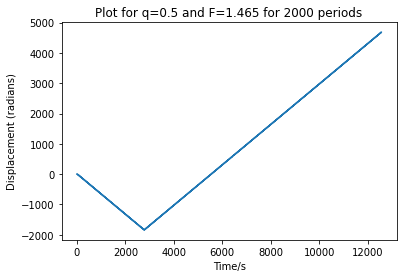

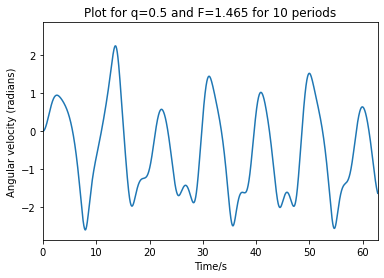

In [23]:
fig, ax1 = plt.subplots()
ax1.plot(t1465, y1465, label="Numerical solution")
ax1.set_xlabel("Time/s")
ax1.set_ylabel("Displacement (radians)")
ax1.set_title("Plot for q=0.5 and F=1.465 for 2000 periods")
print("period is",  find_period(t1465, dydt1465))
fig, ax1 = plt.subplots()
ax1.plot(t1465, dydt1465, label="Numerical solution")
ax1.set_xlabel("Time/s")
ax1.set_ylabel("Angular velocity (radians)")
ax1.set_title("Plot for q=0.5 and F=1.465 for 10 periods")
plt.xlim([0, 20*np.pi])


In the first part we investigate the effects of damping on the displacement. The 3 plots show light, critical and heavy damping respectivelly, all in line with the small angle approximations.

The next plots show transient response with light damping and different strenght of driving forces. We observe well-behaved response for F=0.5, a chatic response for F=1.2. For the last two we observe a diverging linear response. Around 3000 seconds in, the phase shifts for F=1.456. The periods are derived from the angular velocity components. We observe how the periods converge to the period of the driving force. The period for the chaotic responce is probably not very meaningful.

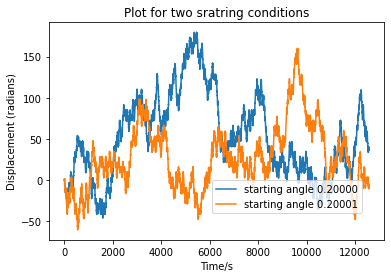

In [24]:
F=1.2
q=0.5
solution = integrate.solve_ivp(
    fun=derivatives,
    t_span=(0, 4000*np.pi),
    y0 = (0.2, 0),
    args = (F, q),
    t_eval = np.linspace (0, 4000*np.pi, 1000000),
)
t12_1,y12_1, dydt12_1 = solution.t, solution.y[0], solution.y[1]

F=1.2
q=0.5
solution = integrate.solve_ivp(
    fun=derivatives,
    t_span=(0, 4000*np.pi),
    y0 = (0.200001, 0),
    args = (F, q),
    t_eval = np.linspace (0, 4000*np.pi, 1000000),
)
t12_2,y12_2, dydt12_2 = solution.t, solution.y[0], solution.y[1]



t12,y12, dydt12 = solution.t, solution.y[0], solution.y[1]
fig, ax1 = plt.subplots()
ax1.plot(t12_1, y12_1, label="starting angle 0.20000")
ax1.plot(t12_2, y12_2, label="starting angle 0.20001")
ax1.set_xlabel("Time/s")
ax1.set_ylabel("Displacement (radians)")
ax1.set_title("Plot for two sratring conditions")
ax1.legend(loc="lower right", bbox_to_anchor=(0.95, 0.1))

For this part we changed the initial conditions very slightly and we observed two compltely different diverging solutions, which suggests this regime is chaotic